<a href="https://colab.research.google.com/github/waveology/kitchen/blob/main/introduccion_cdo_climate_data_operators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Climate Data Operators (*cdo*)


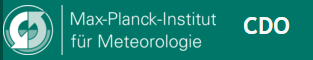

* [Web del proyecto](https://code.mpimet.mpg.de/projects/cdo/wiki/Cdo#Documentation)
* [Guía de usuario](https://code.mpimet.mpg.de/projects/cdo/embedded/cdo.pdf)

Organización de los operadores por tipo de acción:
>* Información
* Operaciones con ficheros
* Selección
* Comparación
* Modificación
* Aritmética
* Estadística
* Correlación
* Regresión
* Componentes principales
* Interpolación
* Transformación
* Entradas y salidas
* Miscelánea







## Instalación de Climate Data Operators


###A partir de condacolab

In [ ]:
# Instala conda en Colab
# Puede ser necesario ejecutar esta celda dos
# veces para completar el reinicio del entorno
# ---------------------------------------------
!pip install -q condacolab
import condacolab
condacolab.install()

In [ ]:
# Instala CDO
# -------------
condacolab.check()
!mamba install -q cdo

### A partir de conda

In [ ]:
## Consultamos la versión de Python
## ---------------------------------
#!python --version

In [ ]:
# ifile = 'Miniconda3-latest-Linux-x86_64.sh'
# !wget https://repo.anaconda.com/miniconda/{ifile}
# ! chmod +x {ifile}
# ! bash ./{ifile} -b -f -p /usr/local/
# !conda install --channel defaults conda python=3.10 --yes
# !conda update --channel defaults --all --yes
# !conda config --add channels conda-forge
## Especificar la versión de Python del entorno
## ---------------------------------------------
# os.environ['PATH'] += ":/usr/local/lib/python3.10/site-packages"
# !conda install cdo -y

##Descarga de datos

In [ ]:
ifile = 'era5_t2m_w10_2020_europa_025.rar'
!wget -q --no-check-certificate https://owncloud.aemet.es/index.php/s/7tJ8c3UpRK9sqVE/download -O {ifile} && unrar -o+ e {ifile} && rm -f {ifile}
!mv era5_t2m_w10_2020_europa_025.nc era5_2000.nc

ifile = 'era5_t2m_1987_2020_europa_025_lsm.rar'
!wget -q --no-check-certificate https://owncloud.aemet.es/index.php/s/leirUBqlMnLxIAL/download -O {ifile} && unrar -o+ e {ifile} && rm -f {ifile}
!mv era5_t2m_1987_2020_europa_025_lsm.nc mascara_tierra_mar.nc

## Operadores de [información](https://code.mpimet.mpg.de/projects/cdo/embedded/index.html#x1-560002.1)

In [ ]:
# Información y estadística básica
# ---------------------------------
!cdo info era5_2000.nc | head -n 10

In [ ]:
# Información reducida
# ---------------------------------
!cdo sinfo era5_2000.nc | head -n 20

In [ ]:
# Número de parámetros
# ---------------------------------
!cdo npar era5_2000.nc

In [ ]:
# Número de niveles
# ---------------------------------
!cdo nlevel era5_2000.nc

In [ ]:
# Número de fechas
# ---------------------------------
!cdo ndate era5_2000.nc

In [ ]:
# Número de puntos de rejilla de cada variable
# --------------------------------------------
!cdo ngridpoints era5_2000.nc

In [ ]:
# Formato del fichero
# --------------------
!cdo showformat era5_2000.nc

In [ ]:
# Nombre de las variables
# -----------------------
!cdo showname era5_2000.nc

In [ ]:
# Atributos NetCDF de las variables
# ----------------.........----------
!cdo showatts era5_2000.nc

## [Operadores de ficheros](https://code.mpimet.mpg.de/projects/cdo/embedded/index.html#x1-920002.2)

Entre los más utilizados se encuentran los operadores de separación. Estos permiten distribuir la información contenida en un fichero entre varios en base a un criterio.

In [ ]:
# Separa un fichero de datos anuales en 12 ficheros
# con datos mensuales
# ---------------------------------------------------
!cdo splitmon era5_2000.nc mes_

In [ ]:
# Muestra las fechas contenidas en el fichero correspondiente
# al mes de febrero
# ------------------------------------------------------------
!cdo showdate mes_02.nc

In [ ]:
# Separa el fichero de datos de febrero en uno por cada variable
# ---------------------------------------------------------------
!cdo splitvar mes_02.nc febrero_

La operación inversa de aglutinar información de múltiples ficheros en uno se lleva a cabo con los operadores de prefijo *merge*

In [ ]:
# Separa el fichero de datos de febrero en uno por cada variable
# ---------------------------------------------------------------
!cdo mergetime mes_12.nc mes_01.nc mes_02.nc DJF.nc

In [ ]:
# Muestra las fechas contenidas en el fichero correspondiente
# al mes de febrero
# ------------------------------------------------------------
!cdo showdate DJF.nc

En muchos casos los operadores pueden encadenarse anteponiendo un guión a su nombre. Esto optimiza los procesos porque evitan la creación de ficheros intermedios y la escritura a disco es a menudo un cuello de botella en el cálculo intensivo.

In [ ]:
# Encadenado de operadores
# 1) se fusionan los datos correspondientes a los meses de verano
# 2) la fusión resultante se separa en un fichero por cada variable
# ----------------------------------------------------------------------
!cdo  -splitvar -mergetime mes_06.nc mes_07.nc mes_08.nc JJA_

In [ ]:
# Limpieza
# ----------------------------------
!rm -f mes_*.nc febrero_*.nc JJA_*.nc

##Operadores de [selección](https://code.mpimet.mpg.de/projects/cdo/embedded/index.html#x1-1670002.3)

In [ ]:
# Selecciona los datos correspondientes a la temepetatura del invierno climatológico
# ----------------------------------------------------------------------------------
!cdo select,name=t2m,season=DJF era5_2000.nc DJF_t2m.nc

In [ ]:
# Elimina los días 29 de febrero que encuentre en
# el fichero de entrada (dom = day of month)
# -------------------------------------------------------
!cdo delete,dom=29feb DJF_t2m.nc DJF_t2m_sin_29feb.nc

In [ ]:
# Comprobación
# ------------------------------------------------------------
!cdo showdate DJF_t2m.nc
!cdo showdate DJF_t2m_sin_29feb.nc

Las mismas operaciones pero encadenando los operadores.

* Nótese que en general, el orden de encadenamiento puede afectar a la eficiencia.
* Cuando existe ambigüedad en el ámbito de actuación de los operadores se usan paréntesis para clarificarla.

In [ ]:
# Selecciona los datos correspondientes al invierno climatológico y eliminamos el 29 de febrero del resultado
# -O fuerza la sobreescritura de un fichero preexistente
# El resultado de 'select' solo existe en memoria
# ---------------------------------------------------------------------------------------------------------
!cdo -O  -delete,dom=29feb [ -select,name=t2m,season=DJF   era5_2000.nc ]  DJF_t2m_sin_29feb.nc

In [ ]:
# Selecciona un rango arbitrario de fechas
# -------------------------------------------
!cdo seldate,'2020-07-24T00:00:00','2020-08-15T23:59:59' era5_2000.nc europa.nc

## Se obtiene el mismo resultado usando el operador genérico 'select'
## -------------------------------------------------------------------
# !cdo -O select,startdate='2020-07-24T00:00:00',enddate='2020-08-15T23:59:59' era5_2000.nc europa.nc

In [ ]:
!cdo sinfo europa.nc | head -n 10

In [ ]:
# Selecciona una ventana geográfica en torno a la península ibérica
# ------------------------------------------------------------------
!cdo sellonlatbox,-12,5,35,45 europa.nc  peninsula.nc

In [ ]:
# Importamos xarray y Matplotlib para inspeccionar gráficamente el contenido de los ficheros
# -------------------------------------------------------------------------------------------
import xarray as xr
import matplotlib.pyplot as plt

In [ ]:
# Dibujamos el fichero original y el resultante de la selección de ventana geográfica
# ------------------------------------------------------------------------------------
fig,(ax1,ax2) = plt.subplots(1,2, figsize=(12,4))
t1 = xr.open_dataset('europa.nc').t2m.sel(time='20200731').plot(ax=ax1)
t2 = xr.open_dataset('peninsula.nc').t2m.sel(time='20200731').plot(ax=ax2)

In [ ]:
# Remuestreo (no requiere interpolación)
# --------------------------------------------
!cdo samplegrid,4 peninsula.nc remuestreo_4.nc

In [ ]:
fig,(ax1,ax2) = plt.subplots(1,2, figsize=(12,4))
xr.open_dataset('peninsula.nc').t2m.sel(time='20200731').plot(ax=ax1)
xr.open_dataset('remuestreo_4.nc').t2m.sel(time='20200731').plot(ax=ax2)

In [ ]:
# Limpieza
# ---------
!rm -f europa_*.nc peninsula_*.nc

##Operadores de [selección condicional](https://code.mpimet.mpg.de/projects/cdo/embedded/index.html#x1-2180002.4)

Permiten extraer datos de un campo en base a una máscara. Los valores de la máscara pueden ser 0 (falso) o superiores a cero (verdadero).

In [ ]:
# Esta máscara tiene valor 1 en tierra y valor 0 en el mar
# --------------------------------------------------------
!cdo showatts mascara_tierra_mar.nc

In [ ]:
# Extraemos la temperatura de un día cualquiera
# ----------------------------------------------
!cdo select,name=t2m,date=2020-07-24T12:00:00 era5_2000.nc t.nc

In [ ]:
# Aplicamos la máscara para seleccionar solo los valores de temperatura en tierra
# --------------------------------------------------------------------------------
!cdo ifthen   mascara_tierra_mar.nc   t.nc   temperatura_tierra.nc

In [ ]:
!cdo showvar temperatura_tierra.nc

In [ ]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3, figsize=(16,4))
xr.open_dataset('t.nc').t2m.isel(time=0).plot(ax=ax1)
xr.open_dataset('mascara_tierra_mar.nc').lsm.isel(time=0).plot(ax=ax2)
xr.open_dataset('temperatura_tierra.nc').t2m.isel(time=0).plot(ax=ax3)

In [ ]:
# Para seleccionar la temperatura en el mar
# Ahora encadenamos los operadores
#------------------------------------------
!cdo -ifnotthen  mascara_tierra_mar.nc -select,name=t2m,date=2020-07-24T12:00:00 era5_2000.nc  temperatura_mar.nc

In [ ]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3, figsize=(16,4))
xr.open_dataset('t.nc').t2m.isel(time=0).plot(ax=ax1)
xr.open_dataset('mascara_tierra_mar.nc').lsm.isel(time=0).plot(ax=ax2)
xr.open_dataset('temperatura_mar.nc').t2m.isel(time=0).plot(ax=ax3)

también es posible asignar un valor constante al área enmascarada

In [ ]:
# Selección de la temperatura del mar en invierno y la de tierra en verano
#------------------------------------------------------------------------------
!cdo -select,name='t2m',date='2020-06-22T12:00:00' era5_2000.nc t_verano.nc
!cdo -select,name='t2m',date='2020-12-22T12:00:00' era5_2000.nc t_invierno.nc
!cdo -ifthenelse  mascara_tierra_mar.nc t_verano.nc t_invierno.nc hibrido.nc

In [ ]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3, figsize=(16,4))
xr.open_dataset('t_verano.nc').t2m.isel(time=0).plot(ax=ax1,cmap='rainbow',vmin=280,vmax=320)
xr.open_dataset('t_invierno.nc').t2m.isel(time=0).plot(ax=ax2,cmap='rainbow',vmin=280,vmax=320)
xr.open_dataset('hibrido.nc').t2m.isel(time=0).plot(ax=ax3,cmap='rainbow',vmin=280,vmax=320)

## Operadores de [comparación](https://code.mpimet.mpg.de/projects/cdo/embedded/index.html#x1-2390002.5)

Permiten la creación de máscaras. Asignan ceros y unos en función del valor de los campos seleccionados

In [ ]:
# Selección de datos de temperatura del 1 de julio de 2020
# -----------------------------------------------------------
!cdo -select,name='t2m',date='2020-07-01T12:00:00'  era5_2000.nc julio.nc
# Selección de datos de temperatura del 1 de agosto de 2020
# -----------------------------------------------------------
!cdo -select,name='t2m',date='2020-08-01T12:00:00'  era5_2000.nc agosto.nc

# Creación de una máscara que toma valor 1 si la temperatura en julio supera la de agosto
# La opción -b F32 se asegura de que la comparación se realiza con la precisión necesaria
# ----------------------------------------------------------------------------------------
!cdo -b F32 -gt   julio.nc   agosto.nc   julio_mayor_que_agosto.nc

In [ ]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3, figsize=(16,4))
xr.open_dataset('julio.nc').t2m.isel(time=0).plot(ax=ax1,cmap='rainbow',vmin=280,vmax=320)
xr.open_dataset('agosto.nc').t2m.isel(time=0).plot(ax=ax2,cmap='rainbow',vmin=280,vmax=320)
xr.open_dataset('julio_mayor_que_agosto.nc').t2m.isel(time=0).plot(ax=ax3,cmap='rainbow',vmin=0,vmax=1)

##Operadores de [modificación](https://code.mpimet.mpg.de/projects/cdo/embedded/index.html#x1-2510002.6)

Permiten modificar los metadatos, los campos o partes de los campos de un fichero de datos.

In [ ]:
# Atributos antes
# ---------------------
!cdo showatts agosto.nc

# Añadimos un atributo local a la variable t2m
# ----------------------------------------------
!cdo setattribute,t2m@nuevo_atributo="propiedad interesante" agosto.nc tmp

# Añadimos un atributo global
# ----------------------------------------------
!cdo setattribute,fiabilidad="Alta" tmp agosto_mod.nc

# Borra el fichero intermedio
# ----------------------------
!rm -f tmp

# Atributos después
# -------------------
!cdo showatts agosto_mod.nc

In [ ]:
# Versión que encadena la adición de los dos atributos
# ----------------------------------------------------
!cdo -O -setattribute,t2m@nuevo_atributo="propiedad interesante" -setattribute,fiabilidad="Alta" agosto.nc agosto_modificado.nc

In [ ]:
# Invierte el sentido del eje de latitudes
# ----------------------------------------
!cdo sinfo julio.nc
!cdo invertlat julio.nc julio_invlat.nc
!cdo sinfo julio_invlat.nc

In [ ]:
# Para algunas aplicaciones es preferible tener un eje de latitudes crecientes
# Por ejemplo, esta extracción de un rango de latitudes en xarray da un error
# porque en el fichero las latitudes están dispuestas de mayor a menor
# --------------------------------------------------------------------------------
# xr.open_dataset('julio.nc').t2m.isel(time=0).sel(latitude=slice(25,55)).plot()

# Con el fichero modificado funciona sin problemas
# --------------------------------------------------
xr.open_dataset('julio_invlat.nc').t2m.isel(time=0).sel(latitude=slice(25,55)).plot(size=4)

In [ ]:
# Definimos una región indicando las coordenadas de los vértices
# ---------------------------------------------------------------
!rm -f             region.txt
!echo "-5 30"   >> region.txt
!echo "-15 40"  >> region.txt
!echo "-5 50"   >> region.txt
!echo "5 40"    >> region.txt

In [ ]:
# Enmascaramos los datos en el exterior de la región
# Los valores se etiquetan como no válidos (missing)
# ---------------------------------------------------
!cdo maskregion,region.txt agosto.nc region.nc

In [ ]:
# Datos de temperatura en el interior de la región
# --------------------------------------------------
xr.open_dataset('region.nc').t2m.isel(time=0).plot(size=4)

Si la máscara corresponde a una ventana delimitada por paralelos y meridianos basta con indicar las latitudes y longitudes de los contornos con *masklonlatbox*

In [ ]:
# Enmascaramos los datos en el exterior de la región
# Los valores se etiquetan como no válidos (missing)
# ---------------------------------------------------
!cdo -O masklonlatbox,-25,5,30,50 agosto.nc region.nc

# Datos de temperatura en el interior de la región
# --------------------------------------------------
xr.open_dataset('region.nc').t2m.isel(time=0).plot(size=4)

A veces es necesario invalidar determinados datos para que no sean tenidos en cuenta en el cómputo

In [ ]:
# Invalidamos los datos de temperatura en el rango 293-298 K (20-25ºC)
# ----------------------------------------------------------------------
!cdo setrtomiss,293,298 julio.nc  julio_sin_293-298K.nc

# Muestra el mapa sin los valores anulados
# --------------------------------------------------------------------
xr.open_dataset('julio_sin_293-298K.nc').t2m.isel(time=0).plot(size=4)

##Operadores de [aritmética](https://code.mpimet.mpg.de/projects/cdo/embedded/index.html#x1-3370002.7)

Resultan extremadamente útiles los operadores que permiten calcular nuevos campos actuando sobre los existentes.

* expr:  evalúa expresiones aritméticas que se guardan en un nuevo fichero
* aexpr  evalúa expresiones aritméticas que se anexan al fichero original

Cuando las expresiones son complicadas es más conveniente que se definan en un script independiente. En ese caso, los operadores son:

* exprf  
* aexprf

In [ ]:
!cdo seldate,'2020-12-24T12:00:00' era5_2000.nc xmas.nc
!cdo showvar xmas.nc

En este ejemplo el fichero de salida solo contiene el campo creado

In [ ]:
# Calcula el módulo del vector de viento
# ---------------------------------------------
!cdo expr,viento='sqrt(u10*u10+v10*v10)' xmas.nc xmas_viento.nc

# Tenemos una única variable llamada 'viento'
# --------------------------------------------
!cdo showvar xmas_viento.nc

En la versión que usa aexpr en lugar de expr el fichero de salida contiene tanto las variables antiguas como las nuevas

In [ ]:
# Crea una nueva variable con el módulo del viento
# Crea una nueva variable con la temperatura en ºC
# -------------------------------------------------
!cdo -O aexpr,viento='sqrt(u10*u10+v10*v10);tc=t2m-273.15;' xmas.nc xmas_viento.nc

# Tenemos todas las variables en el nuevo fichero
# --------------------------------------------
!cdo showvar xmas_viento.nc

In [ ]:
# Dibujamos el campo de velocidad del viento (módulo del vector) recién creado
# -----------------------------------------------------------------------------
xr.open_dataset('xmas_viento.nc').viento.isel(time=0).plot(size=5, cmap='jet')


# # ¿Añadimos los vectores al gráfico?
# # --------------------------------------
# xr.open_dataset('xmas.nc').isel(time=0).thin({'longitude':5,'latitude':5}).plot.quiver(x='longitude',y='latitude',u='u10',v='v10')


Es posible aplicar operaciones aritméticas sobre los ficheros involucrando constantes. Por ejemplo, el cambio de unidades de la temperatura se puede llevar a cabo de esta otra manera:



In [ ]:
!cdo -b F32 -addc,-273.15 -selvar,t2m xmas.nc tc_xmas.nc

xr.open_dataset('tc_xmas.nc').t2m.isel(time=0).plot(size=5, cmap='jet')

También se pueden realizar determinadas operaciones en pares de ficheros

In [ ]:
!cdo -b F32 sub agosto.nc julio.nc diferencia_julio_agosto.nc

xr.open_dataset('tc_xmas.nc').t2m.isel(time=0).plot(size=5, cmap='seismic')

####Ejemplo: sustracción de la variación estacional

In [ ]:
# Extrae solamente los campos de temperatura y pasa de Kelvin a ºC
# --------------------------------------------------------------------
!cdo -b F32  -addc,-273.15 -selvar,t2m era5_2000.nc  tc.nc

# En cada punto de rejilla sustraemos el promedio mensual de temperatura
# --------------------------------------------------------------------
!cdo -b F32  -monsub tc.nc -monavg tc.nc tc_sin_variacion_estacional.nc



In [ ]:
# Dibujamos la serie temporal correspondiente a Madrid
# ----------------------------------------------------------
fig,(ax1,ax2)=plt.subplots(2,1)
xr.open_dataset('tc.nc').t2m.sel(longitude=-3,latitude=40, method='nearest').plot(ax=ax1)
xr.open_dataset('tc_sin_variacion_estacional.nc').t2m.sel(longitude=-3,latitude=40, method='nearest').plot(ax=ax2)
plt.tight_layout()